![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


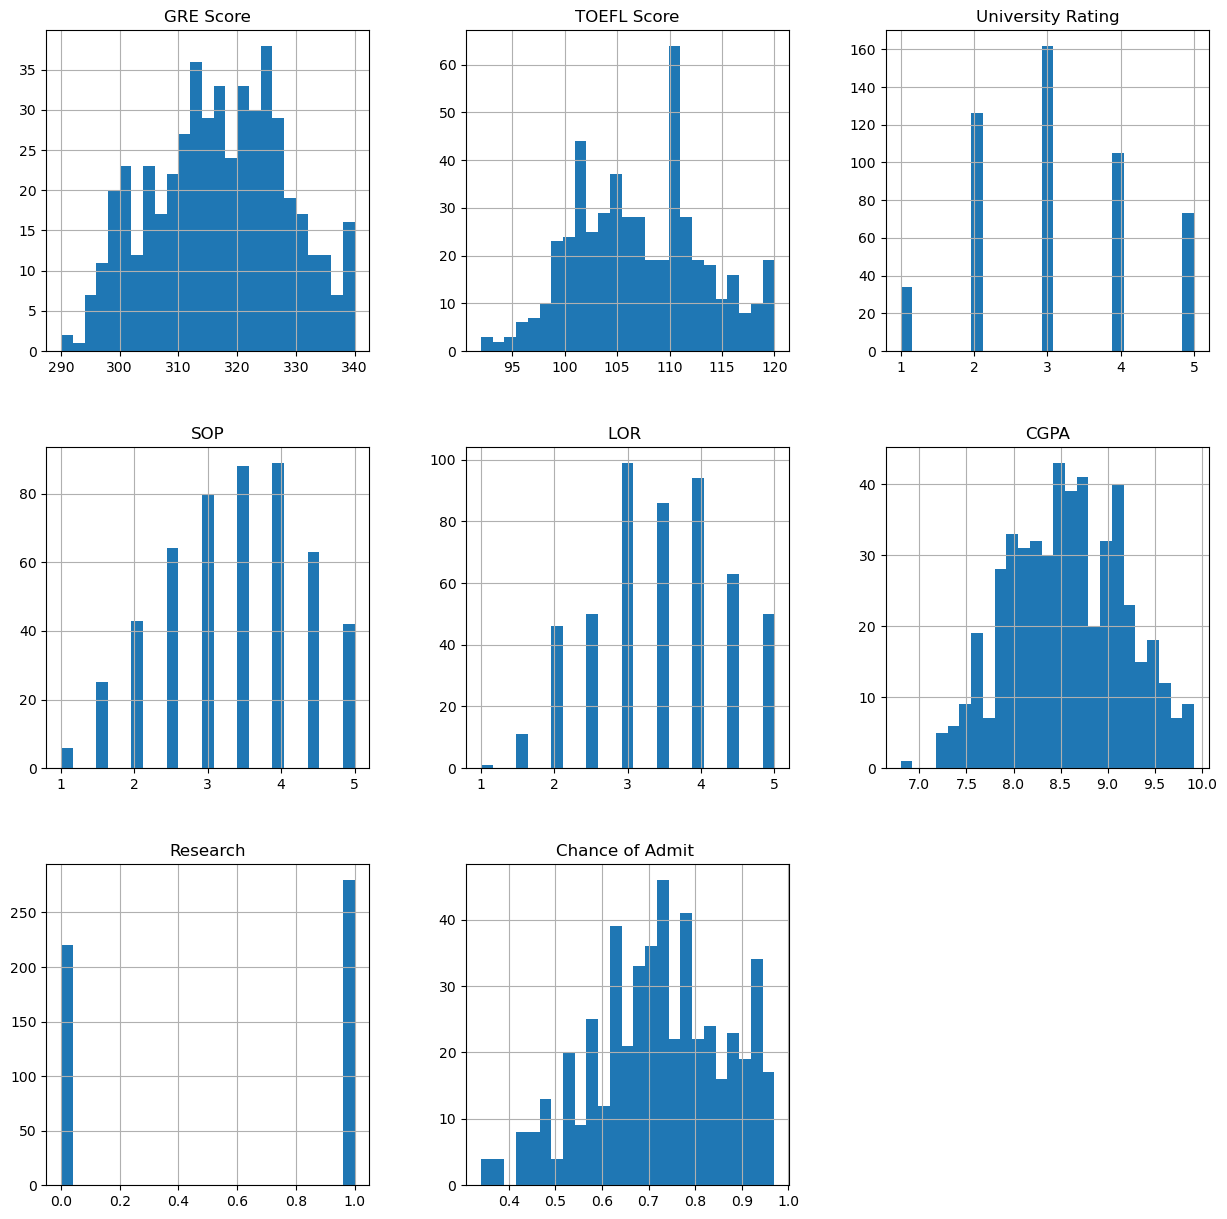

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 0 - Pre-procesamiento de los Datos

Se estandarizan las variables predictoras utilizando StandardScaler de Scikit-Learn. Esto es importante para muchos algoritmos de aprendizaje automático, ya que ayuda a que las características estén en la misma escala, lo que puede mejorar el rendimiento del modelo.

En primera instacia, se opta por la normalización en lugar de la estandarización debido a que se van a emplear modelos de redes neuronales. La normalización asegura que los datos estén en la misma escala, lo cual es fundamental para los modelos de redes neuronales, ya que estos utilizan medidas de distancia o similitud y requieren que las características estén en un rango similar para un rendimiento óptimo.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
#_________________________________________________________________________________________
#
# 0.1 Normalización de los datos
#_________________________________________________________________________________________

# Función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Acontinuaación se realiza la transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [9]:
#_________________________________________________________________________________________
#
# 0.2 Normalización-Estandarización de los datos (Opcional)
#_________________________________________________________________________________________

from sklearn.pipeline import Pipeline

# Usar PipeLine para estandarizar y normalizar
preprocessor = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('standard_scaler', StandardScaler())
])

X_normalized_standardized = preprocessor.fit_transform(X)

# Acontinuaación se realiza la transformación de los set de entrenamiento y test
xTrain_transformed = pd.DataFrame(data=preprocessor.transform(xTrain))
xTest_transformed = pd.DataFrame(data=preprocessor.transform(xTest))


xTrain_np = np.array(xTrain_transformed)
yTrain_np = np.array(yTrain)
xTest_np = np.array(xTest_transformed)
yTest_np = np.array(yTest)

In [10]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

1  output variables


In [11]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [12]:
# Celda 1
# Importación librerías
from keras.models import Sequential
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from tensorflow.keras.optimizers import Adam
import time

### 1.1 Modelos base

Se define un primer modelo y se evalua su rendimiento para posteriormente realizar el ajuste de hiperparametros pertienente

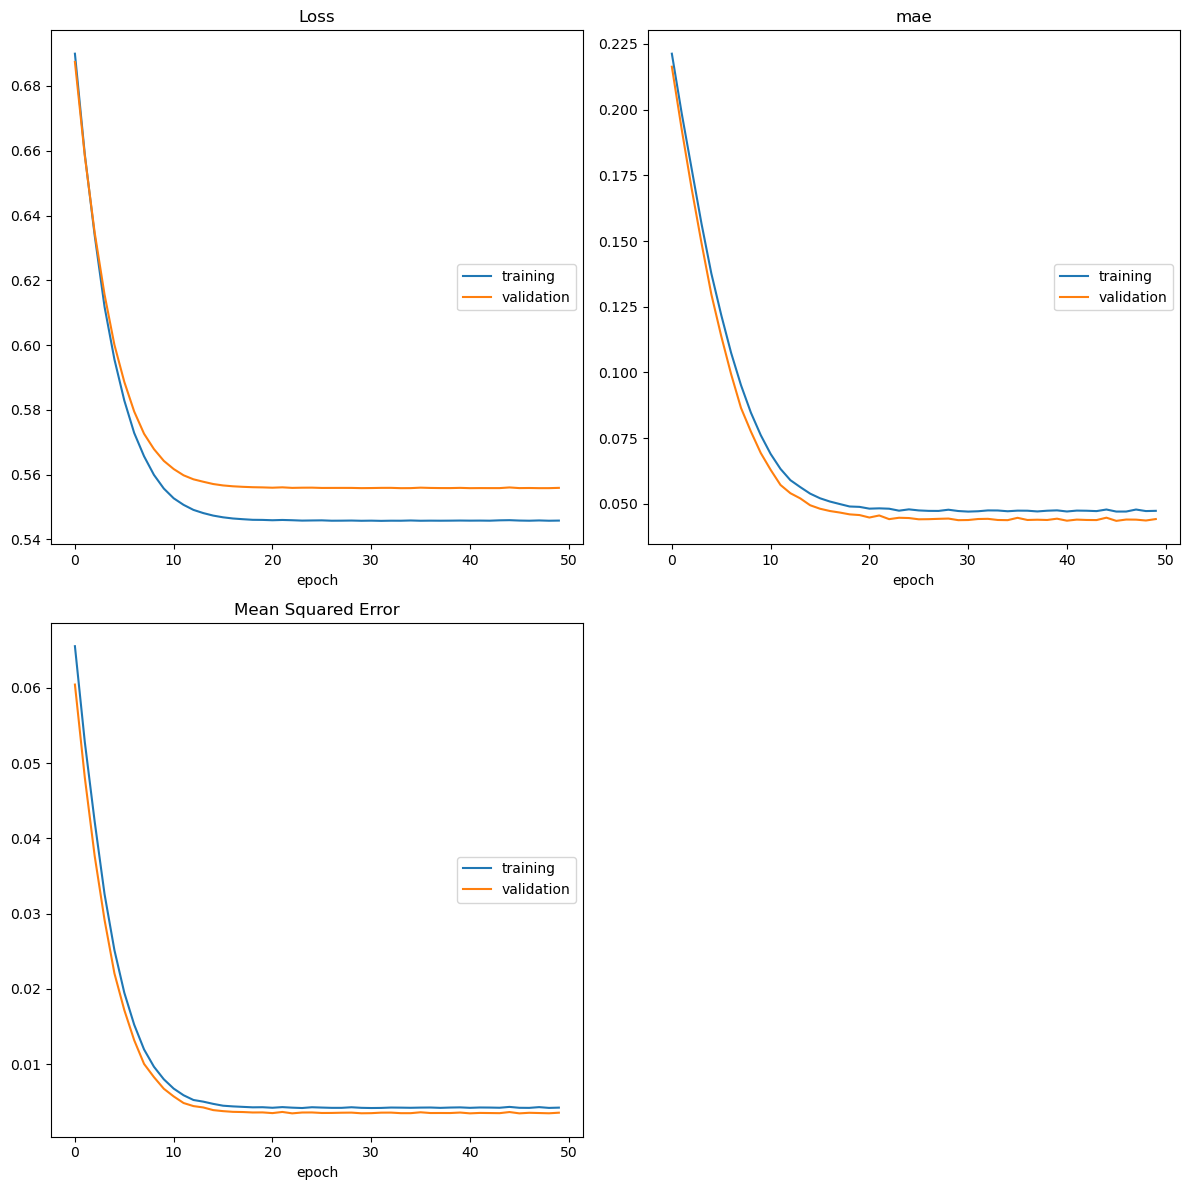

Loss
	training         	 (min:    0.546, max:    0.690, cur:    0.546)
	validation       	 (min:    0.556, max:    0.687, cur:    0.556)
mae
	training         	 (min:    0.047, max:    0.221, cur:    0.047)
	validation       	 (min:    0.044, max:    0.216, cur:    0.044)
Mean Squared Error
	training         	 (min:    0.004, max:    0.066, cur:    0.004)
	validation       	 (min:    0.003, max:    0.060, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5513 - mae: 0.0473 - mse: 0.0043 - val_loss: 0.5559 - val_mae: 0.0442 - val_mse: 0.0035
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [13]:
#_________________________________________________________________________________________
#
# 1.1 Se define una Red neuronal neuronal con la función Sequential()  secuencial con una capa densa (completamente conectada) 
#    de una neurona, que recibe como entrada el número de variables predictoras y tiene una función de activación sigmoidal.
#    Esta red sirve como base para realizar los ajustes de hiperparametros pertienentes
#_________________________________________________________________________________________

model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['mae', 'mse'])

# Entrenamiento de la red neuronal con 50 épocas y con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

start_time = time.time() # registro del tiempo actual
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])
end_time = time.time() # registro del tiempo actual
training_time1 = end_time - start_time # cálculo del tiempo de entrenamiento

# Evaluar el modelo en los sets de entrenamiento y test
y_pred_1 = model.predict(xTest)
train_loss, train_mae_punto1, train_mse_punto1 = model.evaluate(xTrain, yTrain, verbose=0)
test_loss, test_mae_punto1, test_mse_punto1 = model.evaluate(xTest, yTest, verbose=0)


In [14]:
# Metricas
# R cuadrado (R²)
r_squared = r2_score(yTest, y_pred_1)
# Error absoluto porcentual medio (MAPE)
mape = mean_absolute_percentage_error(yTest, y_pred_1)
# Error de raíz cuadrada medio porcentual (RMSE)
rmse = np.sqrt(mean_squared_error(yTest, y_pred_1))
# Coeficiente de correlación de Pearson
pearson_corr = np.corrcoef(yTest.flatten(), y_pred_1.flatten())[0, 1]
# Índice de concordancia de Lin (CCC)
y_mean = np.mean(yTest)
ccc = 2 * (pearson_corr * np.std(y_pred_1) * np.std(yTest)) / (np.var(y_pred_1) + np.var(yTest) + (y_mean - y_mean) ** 2)
print("R cuadrado (R²):", r_squared)
print("Error absoluto porcentual medio (MAPE):", mape)
print("Error de raíz cuadrada medio porcentual (RMSE):", rmse)
print("Coeficiente de correlación de Pearson:", pearson_corr)
print("Índice de concordancia de Lin (CCC):", ccc)
print(f'Train MAE: {train_mae_punto1:.4f}, Train MSE: {train_mse_punto1:.4f}')
print(f'Test MAE: {test_mae_punto1:.4f}, Test MSE: {test_mse_punto1:.4f}')


R cuadrado (R²): 0.8332341377497579
Error absoluto porcentual medio (MAPE): 0.07071181287866513
Error de raíz cuadrada medio porcentual (RMSE): 0.05948882107818359
Coeficiente de correlación de Pearson: 0.9148169313977881
Índice de concordancia de Lin (CCC): 0.9145125327076082
Train MAE: 0.0473, Train MSE: 0.0042
Test MAE: 0.0442, Test MSE: 0.0035


### 1.2 Ajuste Hiperparámetros

Ajustar los hiperparámetros de la red neuronal es crucial para mejorar su rendimiento, acontinuación se busca seleccionar la función de pérdida, el optimizador y el número de épocas, que brinde el mejor resultado y en concordancia con un equilibro en el uso de recursos.

<table style='font-size: 14px; border-collapse: collapse;'>
    <col width='20%'><col width='80%'>
    <tr><th style='font-weight: bold;'>Característica</th><th>Descripción</th></tr>
    <tr><td style='font-weight: bold;'>A: Función de pérdida</td><td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'>Para un problema de regresión como este, donde se busca predecir una variable continua (probabilidad de admisión), la función de pérdida más común es el error cuadrático medio (MSE), sin embargo, se desea probar otras funciones de pérdida, las cuales podrían ser: mean_absolute_error, mean_squared_logarithmic_error, o huber_loss. Con el fin de hallar aquella que brinde un mejor resultado.</td></tr>
    <tr><td style='font-weight: bold;'>B: Optimizador</td><td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'>El optimizador controla cómo se actualizan los pesos de la red durante el entrenamiento. El optimizador Adam es una opción popular y generalmente funciona bien en una variedad de problemas. Sin embargo, se desea probar otros optimizadores como RMSprop o SGD y ajustar su tasa de aprendizaje para ver cómo afectan al rendimiento del modelo, el objetivo es encontrar el optimizador que brinde el mejor resultado.</td></tr>
</table>

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import mean_squared_error
import numpy as np
from tensorflow.keras.losses import Huber

In [16]:
#______________________________________________________________________________________________________________
#
# Se crean las funciones y clases para evaluar el comportamiento de los modelos ante las variaciones de los 
# hiperparámetros antes mencionados, en primer lugar se valida para cada tipo de función de perdida, el 
# impacto de la variación del optimizador.
#
# Otra moficación es la utilizar los datos despues de ser normalizados y escalizados para 
# validar el impacto de esta accción
#______________________________________________________________________________________________________________


#______________________________________________________________________________________________________________
#class CustomKerasRegressor(BaseEstimator, TransformerMixin):: Define una nueva clase llamada CustomKerasRegressor
#que hereda de las clases BaseEstimator y TransformerMixin de scikit-learn, esto implica que la clase que estamos 
#definiendo será un estimador personalizado, que funcionara con GridSearchCV y Pipeline.
#______________________________________________________________________________________________________________

class CustomKerasRegressor(BaseEstimator, TransformerMixin):
    def __init__(self, build_fn, optimizer=Adam(),loss_function='mean_squared_error' ,epochs=50,verbose=1, validation_data=None):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.loss_function = loss_function
        self.epochs = epochs
        self.verbose = verbose
        self.validation_data = validation_data
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn(optimizer=self.optimizer, loss_function=self.loss_function)
        self.model.fit(X, y, epochs=self.epochs, verbose=self.verbose,validation_data=self.validation_data)
        return self

    def predict(self, X):
        return self.model.predict(X)
#______________________________________________________________________________________________________________
#En esta función create_model, optimizer es un parámetro que representa el optimizador que se utilizará al 
#compilar el modelo. Por defecto, si no se proporciona ningún valor para optimizer al llamar a create_model,
#se utiliza el optimizador Adam.
#______________________________________________________________________________________________________________

def create_model(optimizer=Adam(), loss_function='mean_squared_error'):
    model = Sequential()
    model.add(Dense(1, input_dim=xTrain_np.shape[1], activation='sigmoid'))
    model.compile(loss=loss_function, optimizer=optimizer, metrics=['mae', 'mse'])
    return model

# Definir la función de pérdida
loss_function = 'mean_squared_error'

# Estimador
estimator = CustomKerasRegressor(build_fn=create_model, loss_function=loss_function)

# Cuadrícula de parámetros para el optimizador
param_grid = {
    'optimizer': [Adam(), RMSprop(), SGD()]
}

# Búsqueda en la cuadrícula, se aclara que se usa neg_mean_squared_error debido a que GridSearchCV busca el mejor
# resultado es decir el mas alto, que para este caso debera ser el mas bajo.

grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(xTrain_np, yTrain_np)

# Resultados
print("La mejor combinacion de hiperparámetros es: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
results_mse = grid_result.cv_results_
for optimizer in ['Adam', 'RMSprop', 'SGD']:
    print(f"Resultados para {optimizer}:")
    for mean_score, params in zip(results_mse['mean_test_score'], results_mse['params']):
        if params['optimizer'].__class__.__name__ == optimizer:
            print(f" - MSE: {mean_score:.4f}, Parámetros: {params}")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5561 - mae: 0.7312 - mse: 0.5561  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5628 - mae: 0.7379 - mse: 0.5628 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5542 - mae: 0.7313 - mse: 0.5542 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5403 - mae: 0.7230 - mse: 0.5403 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5515 - mae: 0.7288 - mse: 0.5515 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5712 - mae: 0.7430 - mse: 0.5712 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5524 - mae: 0.7300 - mse: 0.5524 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5660 - mae: 0.7392 - mse: 0.5660 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5469 - mae: 0.7256 - mse: 0.5469 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5382 - mae: 0.7185 - mse: 0.5382 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5116 - mae: 0.6949 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0937 - mae: 0.2773 - mse: 0.0937 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0961 - mae: 0.2788 - mse: 0.0961 
Epoch 17/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0950 - mae: 0.2775 - mse: 0.0950 
Epoch 18/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0987 - mae: 0.2850 - mse: 0.0987 
Epoch 19/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0962 - mae: 0.2767 - mse: 0.0962 
Epoch 20/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1018 - mae: 0.2918 - mse: 0.1018 
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0940 - mae: 0.2767 - mse: 0.0940 
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0885 - mae: 0.2659 - mse: 0.0885 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0944 - mae: 0.2758 - mse: 0.0944 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1033 - mae: 0.2891 - mse: 0.1033 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0948 - mae: 0.2783 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0689 - mae: 0.2194 - mse: 0.0689 
Epoch 18/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0619 - mae: 0.2109 - mse: 0.0619 
Epoch 19/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0643 - mae: 0.2108 - mse: 0.0643 
Epoch 20/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0602 - mae: 0.2050 - mse: 0.0602 
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0584 - mae: 0.2003 - mse: 0.0584 
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0533 - mae: 0.1889 - mse: 0.0533 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0556 - mae: 0.1912 - mse: 0.0556 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0543 - mae: 0.1901 - mse: 0.0543 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0590 - mae: 0.1951 - mse: 0.0590 
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0535 - mae: 0.1862 - mse: 0.0535 
Epoch 27/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0506 - mae: 0.1798 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0903 - mae: 0.2671 - mse: 0.0903 
Epoch 32/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0896 - mae: 0.2660 - mse: 0.0896 
Epoch 33/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0921 - mae: 0.2715 - mse: 0.0921 
Epoch 34/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0936 - mae: 0.2703 - mse: 0.0936 
Epoch 35/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0872 - mae: 0.2606 - mse: 0.0872 
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0860 - mae: 0.2593 - mse: 0.0860 
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0942 - mae: 0.2751 - mse: 0.0942 
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0875 - mae: 0.2613 - mse: 0.0875 
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0967 - mae: 0.2706 - mse: 0.0967 
Epoch 40/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0898 - mae: 0.2654 - mse: 0.0898 
Epoch 41/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0930 - mae: 0.2691 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0666 - mae: 0.2159 - mse: 0.0666 
Epoch 46/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0684 - mae: 0.2177 - mse: 0.0684 
Epoch 47/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0689 - mae: 0.2221 - mse: 0.0689 
Epoch 48/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0663 - mae: 0.2177 - mse: 0.0663 
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0714 - mae: 0.2251 - mse: 0.0714 
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0728 - mae: 0.2270 - mse: 0.0728 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5501 - mae: 0.7297 - mse: 0.5501  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5576 - mae: 0.7342 - mse: 0.5576 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5387 - mae: 0.7205 - mse: 0.5387 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5480 - mae: 0.7262 - mse: 0.5480 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5574 - mae: 0.7332 - mse: 0.5574 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5553 - mae: 0.7313 - mse: 0.5553 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5440 - mae: 0.7239 - mse: 0.5440 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5487 - mae: 0.7256 - mse: 0.5487 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5520 - mae: 0.7295 - mse: 0.5520 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5609 - mae: 0.7369 - mse: 0.5609 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5586 - mae: 0.7343 - mse: 0.5586 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5481 - mae: 0.7267 - mse: 0.5481 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5466 - mae: 0.7258 - mse: 0.5466 
Epoch 17/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5647 - mae: 0.7376 - mse: 0.5647 
Epoch 18/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5631 - mae: 0.7373 - mse

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5372 - mae: 0.7199 - mse: 0.5372 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5406 - mae: 0.7233 - mse: 0.5406 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5441 - mae: 0.7256 - mse: 0.5441 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5454 - mae: 0.7254 - mse: 0.5454 
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5355 - mae: 0.7197 - mse: 0.5355 
Epoch 27/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5417 - mae: 0.7241 - mse: 0.5417 
Epoch 28/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5380 - mae: 0.7204 - mse: 0.5380 
Epoch 29/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5483 - mae: 0.7276 - mse: 0.5483 
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5361 - mae: 0.7195 - mse: 0.5361 
Epoch 31/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5408 - mae: 0.7233 - mse: 0.5408 
Epoch 32/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5334 - mae: 0.7193 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5325 - mae: 0.7162 - mse: 0.5325 
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5385 - mae: 0.7206 - mse: 0.5385 
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5367 - mae: 0.7187 - mse: 0.5367 
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5367 - mae: 0.7186 - mse: 0.5367 
Epoch 40/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5560 - mae: 0.7328 - mse: 0.5560 
Epoch 41/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5454 - mae: 0.7250 - mse: 0.5454 
Epoch 42/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5573 - mae: 0.7331 - mse: 0.5573 
Epoch 43/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5387 - mae: 0.7203 - mse: 0.5387 
Epoch 44/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5373 - mae: 0.7193 - mse: 0.5373 
Epoch 45/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5361 - mae: 0.7180 - mse: 0.5361 
Epoch 46/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5504 - mae: 0.7293 - ms

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0464 - mae: 0.1735 - mse: 0.0464 
Epoch 50/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0417 - mae: 0.1649 - mse: 0.0417 
La mejor combinacion de hiperparámetros es: -0.064260 usando {'optimizer': <keras.src.optimizers.adam.Adam object at 0x0000020E566A2690>}
Resultados para Adam:
 - MSE: -0.0643, Parámetros: {'optimizer': <keras.src.optimizers.adam.Adam object at 0x0000020E566A2690>}
Resultados para RMSprop:
 - MSE: -0.2420, Parámetros: {'optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x0000020E566A2AD0>}
Resultados para SGD:
 - MSE: -0.5470, Parámetros: {'optimizer': <keras.src.optimizers.sgd.SGD object at 0x0000020E56667C90>}


In [17]:
# Definir la función de pérdida
loss_function = 'mean_absolute_error'

# Estimador
estimator = CustomKerasRegressor(build_fn=create_model, loss_function=loss_function)

# Cuadrícula de parámetros para el optimizador
param_grid = {
    'optimizer': [Adam(), RMSprop(), SGD()]
}

# Búsqueda en la cuadrícula, se aclara que se usa neg_mean_squared_error debido a que GridSearchCV busca el mejor
# resultado es decir el mas alto, que para este caso debera ser el mas bajo.

grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(xTrain_np, yTrain_np)

# Resultados
print("La mejor combinacion de hiperparámetros es: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
results_mae = grid_result.cv_results_
for optimizer in ['Adam', 'RMSprop', 'SGD']:
    print(f"Resultados para {optimizer}:")
    for mean_score, params in zip(results_mae['mean_test_score'], results_mae['params']):
        if params['optimizer'].__class__.__name__ == optimizer:
            print(f" - MSE: {mean_score:.4f}, Parámetros: {params}")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6448 - mae: 0.6448 - mse: 0.4652  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5892 - mae: 0.5892 - mse: 0.4114 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5395 - mae: 0.5395 - mse: 0.3644 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4827 - mae: 0.4827 - mse: 0.3114 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4199 - mae: 0.4199 - mse: 0.2545 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3918 - mae: 0.3918 - mse: 0.2240 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3556 - mae: 0.3556 - mse: 0.1866 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3291 - mae: 0.3291 - mse: 0.1524 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3174 - mae: 0.3174 - mse: 0.1401 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2956 - mae: 0.2956 - mse: 0.1187 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2946 - mae: 0.2946 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1773 - mae: 0.1773 - mse: 0.0474 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1815 - mae: 0.1815 - mse: 0.0514 
Epoch 17/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1903 - mae: 0.1903 - mse: 0.0518 
Epoch 18/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1739 - mae: 0.1739 - mse: 0.0486 
Epoch 19/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1783 - mae: 0.1783 - mse: 0.0484 
Epoch 20/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1799 - mae: 0.1799 - mse: 0.0490 
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1737 - mae: 0.1737 - mse: 0.0460 
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1693 - mae: 0.1693 - mse: 0.0447 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1696 - mae: 0.1696 - mse: 0.0421 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1764 - mae: 0.1764 - mse: 0.0473 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1774 - mae: 0.1774 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1115 - mae: 0.1115 - mse: 0.0217 
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1151 - mae: 0.1151 - mse: 0.0224 
Epoch 31/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1037 - mae: 0.1037 - mse: 0.0185 
Epoch 32/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0991 - mae: 0.0991 - mse: 0.0181 
Epoch 33/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1013 - mae: 0.1013 - mse: 0.0184 
Epoch 34/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1050 - mae: 0.1050 - mse: 0.0193 
Epoch 35/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1007 - mae: 0.1007 - mse: 0.0192 
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1051 - mae: 0.1051 - mse: 0.0197 
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1065 - mae: 0.1065 - mse: 0.0207 
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0980 - mae: 0.0980 - mse: 0.0181 
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1027 - mae: 0.1027 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0954 - mae: 0.0954 - mse: 0.0146 
Epoch 44/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0917 - mae: 0.0917 - mse: 0.0142 
Epoch 45/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0909 - mae: 0.0909 - mse: 0.0148 
Epoch 46/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0850 - mae: 0.0850 - mse: 0.0126 
Epoch 47/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0941 - mae: 0.0941 - mse: 0.0147 
Epoch 48/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0859 - mae: 0.0859 - mse: 0.0127 
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0846 - mae: 0.0846 - mse: 0.0128 
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0863 - mae: 0.0863 - mse: 0.0134 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7287 - mae: 0.7287 - mse: 0.5497  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7166 - mae: 0.7166 - mse: 0.5298 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2769 - mae: 0.2769 - mse: 0.0972 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2696 - mae: 0.2696 - mse: 0.0924 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2765 - mae: 0.2765 - mse: 0.0954 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2881 - mae: 0.2881 - mse: 0.1040 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2711 - mae: 0.2711 - mse: 0.0928 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2761 - mae: 0.2761 - mse: 0.0965 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2798 - mae: 0.2798 - mse: 0.0976 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2693 - mae: 0.2693 - mse: 0.0910 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2812 - mae: 0.2812 - mse: 0.0975 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2787 - mae: 0.2787 - mse: 0.0973 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2756 - mae: 0.2756 - mse: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.2766 - mae: 0.2766 - mse: 0.0971
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2688 - mae: 0.2688 - mse: 0.0908 
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2830 - mae: 0.2830 - mse: 0.1002 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2686 - mae: 0.2686 - mse: 0.0906 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2764 - mae: 0.2764 - mse: 0.0967 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2722 - mae: 0.2722 - mse: 0.0929 
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2704 - mae: 0.2704 - mse: 0.0927 
Epoch 27/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2585 - mae: 0.2585 - mse: 0.0878 
Epoch 28/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2729 - mae: 0.2729 - mse: 0.0931 
Epoch 29/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2650 - mae: 0.2650 - mse: 0.0910 
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2722 - mae: 0.2722 - m

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2772 - mae: 0.2772 - mse: 0.0951 
Epoch 35/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2684 - mae: 0.2684 - mse: 0.0907 
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2806 - mae: 0.2806 - mse: 0.0983 
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2807 - mae: 0.2807 - mse: 0.0963 
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2727 - mae: 0.2727 - mse: 0.0923 
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.2698 - mae: 0.2698 - mse: 0.0898
Epoch 40/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2733 - mae: 0.2733 - mse: 0.0918 
Epoch 41/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2765 - mae: 0.2765 - mse: 0.0938 
Epoch 42/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2813 - mae: 0.2813 - mse: 0.0974 
Epoch 43/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2736 - mae: 0.2736 - mse: 0.0915 
Epoch 44/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2732 - mae: 0.2732 - m

Epoch 48/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1512 - mae: 0.1512 - mse: 0.0336 
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1253 - mae: 0.1253 - mse: 0.0257 
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.1059 - mae: 0.1059 - mse: 0.0182
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7222 - mae: 0.7222 - mse: 0.5429  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7146 - mae: 0.7146 - mse: 0.5303 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7300 - mae: 0.7300 - mse: 0.5535 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7271 - mae: 0.7271 - mse: 0.5483 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7299 - mae: 0.7299 - mse: 0.5528 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7160 - mae: 0.7160 - mse: 0.5327 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7245 - mae: 0.7245 - mse: 0.5440 
Epoch 8/50
11/11 ━━━━━━

In [18]:
# Definir la función de pérdida
loss_function = 'mean_squared_logarithmic_error'

# Estimador
estimator = CustomKerasRegressor(build_fn=create_model, loss_function=loss_function)

# Cuadrícula de parámetros para el optimizador
param_grid = {
    'optimizer': [Adam(), RMSprop(), SGD()]
}

# Búsqueda en la cuadrícula, se aclara que se usa neg_mean_squared_error debido a que GridSearchCV busca el mejor
# resultado es decir el mas alto, que para este caso debera ser el mas bajo.

grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(xTrain_np, yTrain_np)

# Resultados
print("La mejor combinacion de hiperparámetros es: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
results_msle = grid_result.cv_results_
for optimizer in ['Adam', 'RMSprop', 'SGD']:
    print(f"Resultados para {optimizer}:")
    for mean_score, params in zip(results_msle['mean_test_score'], results_msle['params']):
        if params['optimizer'].__class__.__name__ == optimizer:
            print(f" - MSE: {mean_score:.4f}, Parámetros: {params}")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0270 - mae: 0.2504 - mse: 0.0861  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265 - mae: 0.2513 - mse: 0.0847 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0259 - mae: 0.2472 - mse: 0.0825 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0290 - mae: 0.2607 - mse: 0.0914 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0267 - mae: 0.2458 - mse: 0.0841 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - mae: 0.2558 - mse: 0.0896 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0266 - mae: 0.2454 - mse: 0.0841 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0276 - mae: 0.2559 - mse: 0.0875 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0282 - mae: 0.2555 - mse: 0.0890 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0263 - mae: 0.2471 - mse: 0.0835 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 - mae: 0.2435 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0317 - mae: 0.2687 - mse: 0.0969 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0311 - mae: 0.2758 - mse: 0.0963 
Epoch 17/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0315 - mae: 0.2759 - mse: 0.0979 
Epoch 18/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0289 - mae: 0.2669 - mse: 0.0908 
Epoch 19/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0295 - mae: 0.2700 - mse: 0.0929 
Epoch 20/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0281 - mae: 0.2611 - mse: 0.0883 
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - mae: 0.2701 - mse: 0.0944 
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0291 - mae: 0.2689 - mse: 0.0922 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0281 - mae: 0.2639 - mse: 0.0894 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0296 - mae: 0.2702 - mse: 0.0936 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0260 - mae: 0.2543 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 - mae: 0.1973 - mse: 0.0563 
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0175 - mae: 0.1858 - mse: 0.0519 
Epoch 31/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 - mae: 0.1866 - mse: 0.0512 
Epoch 32/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 - mae: 0.1895 - mse: 0.0529 
Epoch 33/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0177 - mae: 0.1875 - mse: 0.0522 
Epoch 34/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - mae: 0.1856 - mse: 0.0508 
Epoch 35/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 - mae: 0.1906 - mse: 0.0532 
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0190 - mae: 0.1975 - mse: 0.0567 
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 - mae: 0.1955 - mse: 0.0550 
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0177 - mae: 0.1891 - mse: 0.0531
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 - mae: 0.1952 - m

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285 - mae: 0.2677 - mse: 0.0914 
Epoch 44/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0291 - mae: 0.2724 - mse: 0.0932 
Epoch 45/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290 - mae: 0.2706 - mse: 0.0929 
Epoch 46/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286 - mae: 0.2693 - mse: 0.0920 
Epoch 47/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293 - mae: 0.2708 - mse: 0.0939 
Epoch 48/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - mae: 0.2688 - mse: 0.0925 
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0270 - mae: 0.2598 - mse: 0.0869 
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0268 - mae: 0.2603 - mse: 0.0865 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3026 - mae: 0.7294 - mse: 0.5486  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2992 - mae: 0.7237 - mse: 0.5412 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2177 - mae: 0.6391 - mse: 0.4198 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1837 - mae: 0.5857 - mse: 0.3556 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1367 - mae: 0.5075 - mse: 0.2755 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0984 - mae: 0.4183 - mse: 0.2016 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0719 - mae: 0.3393 - mse: 0.1460 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0432 - mae: 0.2512 - mse: 0.0917 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0243 - mae: 0.1866 - mse: 0.0542 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 - mae: 0.1580 - mse: 0.0424 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0125 - mae: 0.1294 - mse: 0.0307 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0106 - mae: 0.1309 - mse: 0.0285 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092 - mae: 0.1242 - mse: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3061 - mae: 0.7338 - mse: 0.5585 
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3064 - mae: 0.7347 - mse: 0.5588 
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2996 - mae: 0.7240 - mse: 0.5424 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3074 - mae: 0.7355 - mse: 0.5626 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3085 - mae: 0.7374 - mse: 0.5649 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3070 - mae: 0.7354 - mse: 0.5606 
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3018 - mae: 0.7267 - mse: 0.5492 
Epoch 27/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2998 - mae: 0.7241 - mse: 0.5439 
Epoch 28/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3032 - mae: 0.7295 - mse: 0.5519 
Epoch 29/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3049 - mae: 0.7316 - mse: 0.5560 
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3085 - mae: 0.7378 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0278 - mae: 0.2679 - mse: 0.0900 
Epoch 35/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0305 - mae: 0.2815 - mse: 0.0981 
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0303 - mae: 0.2817 - mse: 0.0976 
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0306 - mae: 0.2836 - mse: 0.0985 
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0278 - mae: 0.2718 - mse: 0.0904 
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0287 - mae: 0.2713 - mse: 0.0924 
Epoch 40/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0312 - mae: 0.2852 - mse: 0.1001 
Epoch 41/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0273 - mae: 0.2681 - mse: 0.0886 
Epoch 42/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0273 - mae: 0.2688 - mse: 0.0888 
Epoch 43/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0296 - mae: 0.2812 - mse: 0.0957 
Epoch 44/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0314 - mae: 0.2850 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0307 - mae: 0.2766 - mse: 0.0976 
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0300 - mae: 0.2780 - mse: 0.0962 
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0296 - mae: 0.2730 - mse: 0.0947 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3027 - mae: 0.7295 - mse: 0.5504  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2971 - mae: 0.7218 - mse: 0.5394 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2891 - mae: 0.7130 - mse: 0.5280 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2739 - mae: 0.7006 - mse: 0.5092 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2282 - mae: 0.6506 - mse: 0.4420 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1571 - mae: 0.5447 - mse: 0.3220 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0917 - mae: 0.4157 - mse: 0.2061 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━

In [19]:
# Definir la función de pérdida
loss_function = Huber()

# Estimador
estimator = CustomKerasRegressor(build_fn=create_model, loss_function=loss_function)

# Cuadrícula de parámetros para el optimizador
param_grid = {
    'optimizer': [Adam(), RMSprop(), SGD()]
}

# Búsqueda en la cuadrícula, se aclara que se usa neg_mean_squared_error debido a que GridSearchCV busca el mejor
# resultado es decir el mas alto, que para este caso debera ser el mas bajo.

grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(xTrain_np, yTrain_np)

# Resultados
print("La mejor combinacion de hiperparámetros es: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
results_hl = grid_result.cv_results_
for optimizer in ['Adam', 'RMSprop', 'SGD']:
    print(f"Resultados para {optimizer}:")
    for mean_score, params in zip(results_hl['mean_test_score'], results_hl['params']):
        if params['optimizer'].__class__.__name__ == optimizer:
            print(f" - MSE: {mean_score:.4f}, Parámetros: {params}")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0572 - mae: 0.2610 - mse: 0.1143  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0500 - mae: 0.2544 - mse: 0.1000 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0401 - mae: 0.2279 - mse: 0.0802 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0318 - mae: 0.2095 - mse: 0.0636 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0229 - mae: 0.1781 - mse: 0.0457 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215 - mae: 0.1733 - mse: 0.0430 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221 - mae: 0.1775 - mse: 0.0443 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - mae: 0.1649 - mse: 0.0396 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203 - mae: 0.1702 - mse: 0.0405 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0224 - mae: 0.1745 - mse: 0.0447 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0209 - mae: 0.1688 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0474 - mae: 0.2777 - mse: 0.0948 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0507 - mae: 0.2883 - mse: 0.1015 
Epoch 17/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0495 - mae: 0.2826 - mse: 0.0991 
Epoch 18/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0473 - mae: 0.2759 - mse: 0.0945 
Epoch 19/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0465 - mae: 0.2745 - mse: 0.0930 
Epoch 20/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0451 - mae: 0.2719 - mse: 0.0903 
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0450 - mae: 0.2676 - mse: 0.0901
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0463 - mae: 0.2731 - mse: 0.0927 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0487 - mae: 0.2791 - mse: 0.0975 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0498 - mae: 0.2849 - mse: 0.0997 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0467 - mae: 0.2766 - m

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0197 - mae: 0.1593 - mse: 0.0394 
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0209 - mae: 0.1624 - mse: 0.0419 
Epoch 31/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 - mae: 0.1574 - mse: 0.0390 
Epoch 32/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 - mae: 0.1579 - mse: 0.0390 
Epoch 33/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 - mae: 0.1589 - mse: 0.0413 
Epoch 34/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0179 - mae: 0.1495 - mse: 0.0359 
Epoch 35/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0172 - mae: 0.1484 - mse: 0.0344 
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203 - mae: 0.1594 - mse: 0.0406 
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0223 - mae: 0.1685 - mse: 0.0446 
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203 - mae: 0.1594 - mse: 0.0406 
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 - mae: 0.1555 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2778 - mae: 0.7320 - mse: 0.5557 
Epoch 44/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2761 - mae: 0.7299 - mse: 0.5522 
Epoch 45/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2791 - mae: 0.7343 - mse: 0.5582 
Epoch 46/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2754 - mae: 0.7295 - mse: 0.5509 
Epoch 47/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2787 - mae: 0.7333 - mse: 0.5574 
Epoch 48/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2712 - mae: 0.7230 - mse: 0.5425 
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2796 - mae: 0.7353 - mse: 0.5592 
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2759 - mae: 0.7291 - mse: 0.5518 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0452 - mae: 0.2694 - mse: 0.0903  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0476 - mae: 0.2792 - mse: 0.0952 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2708 - mae: 0.7226 - mse: 0.5416 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2678 - mae: 0.7176 - mse: 0.5355 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2734 - mae: 0.7272 - mse: 0.5469 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2683 - mae: 0.7177 - mse: 0.5366 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2731 - mae: 0.7262 - mse: 0.5463 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2817 - mae: 0.7380 - mse: 0.5634 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2653 - mae: 0.7150 - mse: 0.5306 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2736 - mae: 0.7262 - mse: 0.5473 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2753 - mae: 0.7280 - mse: 0.5506 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2680 - mae: 0.7178 - mse: 0.5359 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2685 - mae: 0.7196 - mse: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2805 - mae: 0.7360 - mse: 0.5610 
Epoch 21/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2811 - mae: 0.7363 - mse: 0.5622 
Epoch 22/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2721 - mae: 0.7238 - mse: 0.5442 
Epoch 23/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2732 - mae: 0.7258 - mse: 0.5463 
Epoch 24/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2781 - mae: 0.7326 - mse: 0.5562 
Epoch 25/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2811 - mae: 0.7373 - mse: 0.5622 
Epoch 26/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2721 - mae: 0.7242 - mse: 0.5442 
Epoch 27/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2778 - mae: 0.7320 - mse: 0.5556 
Epoch 28/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2733 - mae: 0.7250 - mse: 0.5466 
Epoch 29/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2847 - mae: 0.7419 - mse: 0.5695 
Epoch 30/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2787 - mae: 0.7333 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0390 - mae: 0.2417 - mse: 0.0780 
Epoch 35/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0390 - mae: 0.2474 - mse: 0.0780 
Epoch 36/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0426 - mae: 0.2574 - mse: 0.0852 
Epoch 37/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0392 - mae: 0.2408 - mse: 0.0783 
Epoch 38/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0412 - mae: 0.2527 - mse: 0.0824 
Epoch 39/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0411 - mae: 0.2490 - mse: 0.0821 
Epoch 40/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0385 - mae: 0.2422 - mse: 0.0771 
Epoch 41/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0349 - mae: 0.2317 - mse: 0.0698 
Epoch 42/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0366 - mae: 0.2344 - mse: 0.0733 
Epoch 43/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0361 - mae: 0.2334 - mse: 0.0721 
Epoch 44/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0397 - mae: 0.2491 - ms

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2659 - mae: 0.7153 - mse: 0.5318 
Epoch 49/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2748 - mae: 0.7292 - mse: 0.5496 
Epoch 50/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2691 - mae: 0.7196 - mse: 0.5382 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0486 - mae: 0.2785 - mse: 0.0972  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0444 - mae: 0.2613 - mse: 0.0887 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0418 - mae: 0.2518 - mse: 0.0837 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0348 - mae: 0.2215 - mse: 0.0695 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0211 - mae: 0.1636 - mse: 0.0422 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0209 - mae: 0.1617 - mse: 0.0418 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0162 - mae: 0.1441 - mse: 0.0323 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━

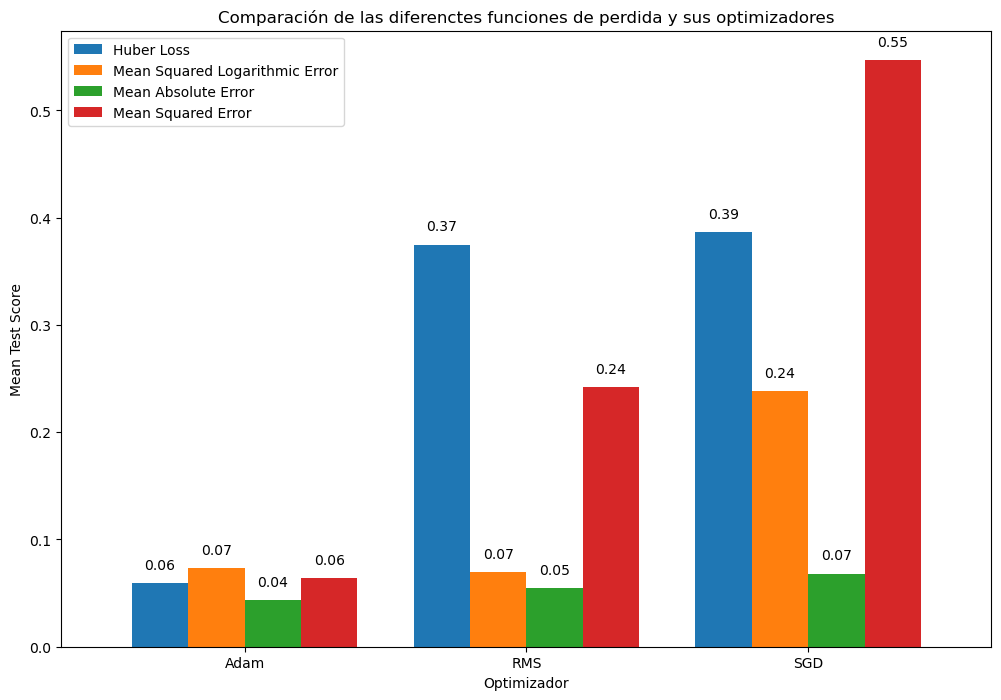

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame
df = pd.DataFrame({
    'Huber Loss': results_hl['mean_test_score'],
    'Mean Squared Logarithmic Error': results_msle['mean_test_score'],
    'Mean Absolute Error': results_mae['mean_test_score'],
    'Mean Squared Error': results_mse['mean_test_score']
})

# Renombrar los índices 0, 1 y 2 por 'Adam', 'RMS' y 'SGD'
df = df.rename(index={0: 'Adam', 1: 'RMS', 2: 'SGD'})
df_neg = df.mul(-1)

ax = df_neg.plot(kind='bar', figsize=(12, 8), rot=0,width=0.8)
ax.set_xlabel('Optimizador')
ax.set_ylabel('Mean Test Score')
ax.set_title('Comparación de las diferenctes funciones de perdida y sus optimizadores')

# Agregar valores dentro de las barras
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2, height + 0.01, round(height, 2), ha='center', va='bottom')

plt.show()


Como se observa en la grafica, la mejor configuración para los hiperparámetros ajustados es: Función de perdida: Mean Absolute Error y el mejor optimizador es el tipo Adam, esta combinación corresponde al menor Mean Test Scores (0.04), por tal motivo acontinuación se realizara el ajuste de los hiperparametros de Epocas, y tasa de aprendizaje.

<table style='font-size: 14px; border-collapse: collapse;'>
    <col width='20%'><col width='80%'>
    <tr><th style='font-weight: bold;'>Característica</th><th>Descripción</th></tr>
    <tr><td style='font-weight: bold;'>C: Número de épocas</td><td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'>El número de épocas determina cuántas veces la red neuronal verá el conjunto de datos de entrenamiento completo durante el entrenamiento, este se ajusta de acuerdo a la convergencia del modelo. Si la pérdida sigue disminuyendo en el conjunto de entrenamiento y no hay signos de sobreajuste en el conjunto de validación, es posible aumentar el numero de epocas.</td></tr>
    <tr><td style='font-weight: bold;'>D: Tasa de aprendizaje</td><td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'>La tasa de aprendizaje es un hiperparámetro clave que determina el tamaño de los pasos que el optimizador toma para encontrar el mínimo global de la función de pérdida, al ajustar la tasa de aprendizaje se controla la velocidad y estabilidad del entrenamiento.</td></tr>
</table>

In [21]:
from sklearn.base import BaseEstimator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV

In [22]:
#______________________________________________________________________________________________________________
# En la case KerasModel(BaseEstimator) define una nueva clase llamada KerasModel, 
# que hereda de BaseEstimator. BaseEstimator es una clase base en Scikit-Learn que proporciona métodos básicos
# como fit y predict
#______________________________________________________________________________________________________________


class KerasModel(BaseEstimator):
    def __init__(self, learning_rate=0.01, epochs=50, batch_size=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.model = Sequential()
        self.model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
        optimizer = Adam(learning_rate=self.learning_rate)
        self.model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mae', 'mse'])
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
    
    def predict(self, X):
        return self.model.predict(X)

# Cuadrícula de parámetros
param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'epochs': [1, 5, 10, 15, 20, 35, 50],
}


keras_model = KerasModel()

# Realizar la búsqueda aleatoria en la cuadrícula
random_search = RandomizedSearchCV(estimator=keras_model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_result = random_search.fit(xTrain, yTrain)

# Resultados
print("Mejor: %f usando %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━

Como se observa la mejor combinación se obtiene con 35 epocas y una rata de aprendizaje de 0,01. A continuación se valida este resultado con los datos de test, adicionalmente se define una funcion de stopping earling para validar como funciona el modelo y si los hiperparámetros pueden mejorar.

In [23]:
# Obtener el mejor modelo del resultado de la búsqueda aleatoria
best_model = random_result.best_estimator_
y_pred = best_model.predict(xTest)

# Calcular la métrica deseada en el conjunto de prueba
from sklearn.metrics import mean_squared_error
test_score = mean_squared_error(yTest, y_pred)

print("Puntuación en el conjunto de prueba:", test_score)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Puntuación en el conjunto de prueba: 0.004061951131438207


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# Define tu modelo
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae', 'mse'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Entrena tu modelo con early stopping
history = model.fit(xTrain, yTrain, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Resultados
test_loss, test_mae, test_mse = model.evaluate(xTest, yTest)
print("Pérdida en el conjunto de prueba:", test_loss)
print("MAE en el conjunto de prueba:", test_mae)
print("MSE en el conjunto de prueba:", test_mse)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1262 - mae: 0.2981 - mse: 0.1262 - val_loss: 0.0681 - val_mae: 0.2191 - val_mse: 0.0681
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0666 - mae: 0.2055 - mse: 0.0666 - val_loss: 0.0394 - val_mae: 0.1643 - val_mse: 0.0394
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0401 - mae: 0.1560 - mse: 0.0401 - val_loss: 0.0210 - val_mae: 0.1199 - val_mse: 0.0210
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 - mae: 0.1036 - mse: 0.0165 - val_loss: 0.0116 - val_mae: 0.0885 - val_mse: 0.0116
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - mae: 0.0846 - mse: 0.0104 - val_loss: 0.0073 - val_mae: 0.0706 - val_mse: 0.0073
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - mae: 0.0648 - mse: 0.0062 - val_loss: 0.0053 - val_mae: 0.0601 - val_mse: 0.0053
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - mae: 0.0565 - mse: 0.0052 - val_loss: 

### 1.3 Modelo Ajustado

De acuerdo con el primer análisis, la cantidad de epocas optimas deberia ser 35, sin embargo considerandoq ue despues de una variación del 2% en el MSE, muy probablemente no valga la pena, seguir iterando el modelo, la cantidad de epocas adecuadas serian ser 10, sin embargo debido a que el costo computacional y tiempo de entrenamiento no aumenta significativamente se mantendran las 35 epocas

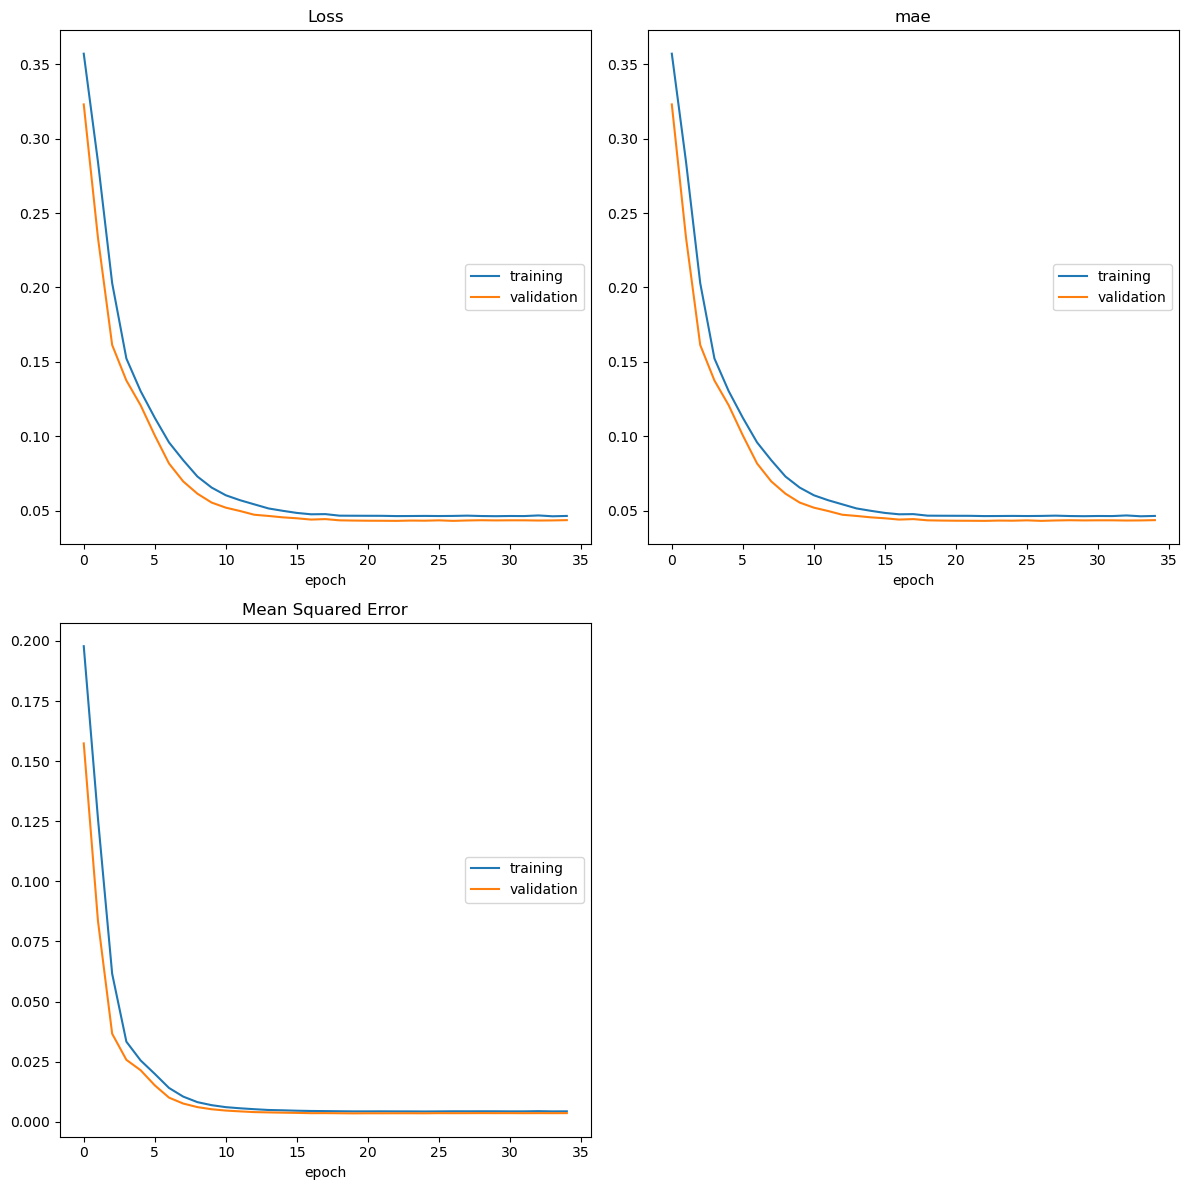

Loss
	training         	 (min:    0.046, max:    0.357, cur:    0.046)
	validation       	 (min:    0.043, max:    0.323, cur:    0.044)
mae
	training         	 (min:    0.046, max:    0.357, cur:    0.046)
	validation       	 (min:    0.043, max:    0.323, cur:    0.044)
Mean Squared Error
	training         	 (min:    0.004, max:    0.198, cur:    0.004)
	validation       	 (min:    0.004, max:    0.157, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0455 - mae: 0.0455 - mse: 0.0040 - val_loss: 0.0436 - val_mae: 0.0436 - val_mse: 0.0036
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [25]:
model_F = Sequential()
model_F.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_F.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae', 'mse'])

# Entrenamiento de la red neuronal con 50 épocas y con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

start_time = time.time() # registro del tiempo actual
model_F.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=35, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])
end_time = time.time() # registro del tiempo actual
training_time1 = end_time - start_time # cálculo del tiempo de entrenamiento

# Evaluar el modelo en los sets de entrenamiento y test
y_pred_F = model_F.predict(xTest)
train_loss, train_mae_punto1, train_mse_punto1 = model_F.evaluate(xTrain, yTrain, verbose=0)
test_loss, test_mae_punto1, test_mse_punto1 = model_F.evaluate(xTest, yTest, verbose=0)


In [26]:
# Metricas
# R cuadrado (R²)
r_squared_F = r2_score(yTest, y_pred_F)
# Error absoluto porcentual medio (MAPE)
mape_F = mean_absolute_percentage_error(yTest, y_pred_F)
# Error de raíz cuadrada medio porcentual (RMSE)
rmse_F = np.sqrt(mean_squared_error(yTest, y_pred_F))
# Coeficiente de correlación de Pearson
pearson_corr_F = np.corrcoef(yTest.flatten(), y_pred_F.flatten())[0, 1]
# Índice de concordancia de Lin (CCC)
y_mean_F = np.mean(yTest)
ccc_F = 2 * (pearson_corr_F * np.std(y_pred_F) * np.std(yTest)) / (np.var(y_pred_F) + np.var(yTest) + (y_mean - y_mean) ** 2)
print("R cuadrado (R²):", r_squared_F)
print("Error absoluto porcentual medio (MAPE):", mape_F)
print("Error de raíz cuadrada medio porcentual (RMSE):", rmse_F)
print("Coeficiente de correlación de Pearson:", pearson_corr_F)
print("Índice de concordancia de Lin (CCC):", ccc_F)
print(f'Train MAE: {train_mae_punto1:.4f}, Train MSE: {train_mse_punto1:.4f}')
print(f'Test MAE: {test_mae_punto1:.4f}, Test MSE: {test_mse_punto1:.4f}')


R cuadrado (R²): 0.8294625920415085
Error absoluto porcentual medio (MAPE): 0.07099202859497064
Error de raíz cuadrada medio porcentual (RMSE): 0.06015775416092479
Coeficiente de correlación de Pearson: 0.9133185982103635
Índice de concordancia de Lin (CCC): 0.9116804073805597
Train MAE: 0.0461, Train MSE: 0.0043
Test MAE: 0.0436, Test MSE: 0.0036


### Análisis Punto 1 

De acuerdo con el problema abordado hace referencia un problema de regresión, por lo cual se implementa la prediccion de los valores de salida en el rango [0,1] 

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

### 2.1 Modelos base

Se define un primer modelo y se evalua su rendimiento para posteriormente realizar el ajuste de hiperparametros pertienente

In [27]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

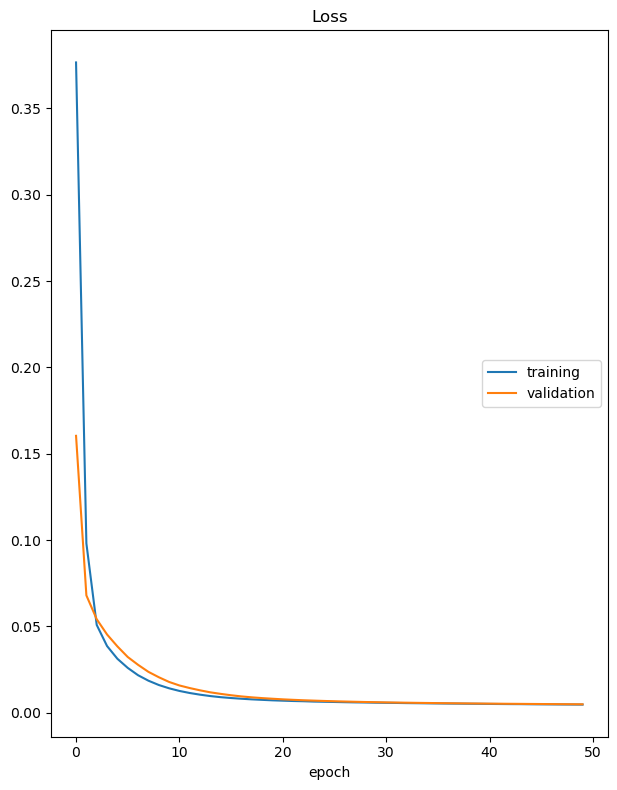

Loss
	training         	 (min:    0.005, max:    0.377, cur:    0.005)
	validation       	 (min:    0.005, max:    0.160, cur:    0.005)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050 - val_loss: 0.0048


In [29]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain,
          validation_data = (xTest, yTest),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

In [30]:
# Predecir los resultados
yPred_2 = model.predict(xTest)

# Calcular las métricas de desempeño
mae_punto2 = mean_absolute_error(yTest, yPred_2)
mse_punto2 = mean_squared_error(yTest, yPred_2)

print("Mean Absolute Error (MAE):", mae_punto2)
print("Mean Squared Error (MSE):", mse_punto2)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Absolute Error (MAE): 0.05476231342951456
Mean Squared Error (MSE): 0.0048289291987647035


In [31]:
# Resultados
mae_punto2 = mean_absolute_error(yTest, yPred_2)
mse_punto2 = mean_squared_error(yTest, yPred_2)

# Calcular R cuadrado (R²)
r_squared_punto2 = r2_score(yTest, yPred_2)
# Calcular error absoluto porcentual medio (MAPE)
mape_punto2 = mean_absolute_percentage_error(yTest, yPred_2)
# Calcular error de raíz cuadrada medio porcentual (RMSE)
rmse_punto2 = np.sqrt(mean_squared_error(yTest, yPred_2))
# Calcular coeficiente de correlación de Pearson
pearson_corr_punto2 = np.corrcoef(yTest.flatten(), yPred_2.flatten())[0, 1]
# Calcular índice de concordancia de Lin (CCC)
y_mean_punto2 = np.mean(yTest)
ccc_punto2 = 2 * (pearson_corr_punto2 * np.std(yPred_2) * np.std(yTest)) / (np.var(yPred_2) + np.var(yTest) + (y_mean_punto2 - y_mean_punto2) ** 2)


print("R cuadrado (R²):", r_squared_punto2)
print("Error absoluto porcentual medio (MAPE):", mape_punto2)
print("Error de raíz cuadrada medio porcentual (RMSE):", rmse_punto2)
print("Coeficiente de correlación de Pearson:", pearson_corr_punto2)
print("Índice de concordancia de Lin (CCC):", ccc_punto2)
print("Mean Absolute Error (MAE):", mae_punto2)
print("Mean Squared Error (MSE):", mse_punto2)

R cuadrado (R²): 0.7724445368877504
Error absoluto porcentual medio (MAPE): 0.08700288183834863
Error de raíz cuadrada medio porcentual (RMSE): 0.06949049718317393
Coeficiente de correlación de Pearson: 0.882878014375131
Índice de concordancia de Lin (CCC): 0.881518635700198
Mean Absolute Error (MAE): 0.05476231342951456
Mean Squared Error (MSE): 0.0048289291987647035


### 1.2 Ajuste Hiperparámetros

Ajustar los hiperparámetros de la red neuronal es crucial para mejorar su rendimiento, acontinuación se busca seleccionar la función de pérdida, el optimizador y el número de épocas, que brinde el mejor resultado y en concordancia con un equilibro en el uso de recursos.

In [32]:
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error


In [33]:
#______________________________________________________________________________________________________________
# A continuación, se realiza la optimización de los Hiperparámetros de tasa de aprendizaje
# debido a que en el primer punto se observo que el predictor que mejor funciona es Adam se utilizara en esta caso.
#______________________________________________________________________________________________________________
# Definir los posibles valores de tasa de aprendizaje
learning_rates = [0.001, 0.01, 0.1]

best_lr = None
best_mse = float('inf')

for lr in learning_rates:
    K.clear_session()

    # Modelo base
    model_2 = Sequential()
    model_2.add(Dense(256, input_shape=(dims,), activation='relu'))
    model_2.add(Dense(256, activation='relu'))
    model_2.add(Dense(output_var))
    optimizer = Adam(learning_rate=lr)
    model_2.compile(optimizer=optimizer, loss='mean_squared_error')
    model_2.fit(xTrain, yTrain, epochs=50, verbose=0)

    # Predicciones
    y_pred = model_2.predict(xTest)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(yTest, y_pred)

    # Actualizar la mejor tasa de aprendizaje si se encuentra un MSE menor
    if mse < best_mse:
        best_lr = lr
        best_mse = mse

print("La mejor tasa de aprendizaje encontrada:", best_lr)
print("Mejor MSE obtenido:", best_mse)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
La mejor tasa de aprendizaje encontrada: 0.01
Mejor MSE obtenido: 0.003847637735511521


In [42]:
#______________________________________________________________________________________________________________
# A continuación, se realiza la optimización de los Hiperparámetros epocas
# debido a que en el primer punto se observo que el predictor que mejor funciona es Adam se utilizara en esta caso.
#______________________________________________________________________________________________________________

def create_model_2(lr=0.01, epochs=50):
    model_2 = Sequential()
    model_2.add(Dense(256, input_shape=(dims,), activation='relu'))
    model_2.add(Dense(256, activation='relu'))
    model_2.add(Dense(output_var))
    optimizer = Adam(learning_rate=lr)
    model_2.compile(optimizer=optimizer, loss='mean_squared_error')
    return model_2

param_grid = {'epochs': [5,10,20,25,30,35,38,40,45,50]}

best_mse = float('inf')
best_epochs = None

for epochs in param_grid['epochs']:
    
    model_2 = create_model_2(epochs=epochs)
    model_2.fit(xTrain, yTrain, epochs=epochs, verbose=0)
    # Predicciones
    y_pred_2 = model.predict(xTest)

    # Metricas
    mse = mean_squared_error(yTest, y_pred_2)

    # Actualizar el mejor número de épocas si encontramos un MSE menor
    if mse < best_mse:
        best_mse = mse
        best_epochs = epochs

print("El mejor número de épocas encontrado:", best_epochs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
El mejor número de épocas encontrado: 5


### 1.3 Modelo Ajustado

De acuerdo al ajuste de hiperparametros la mejor tasa de aprendizaje es de 0.01 y la mejor cantidad de epocas para el modelo es de 5. De acuerdo con lo anterior, se procede a ajustar el modelo.

In [43]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model_2_F = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2_F.add(Dense(256, input_shape=(dims,),activation='relu'))
model_2_F.add(Dense(256,activation='relu'))
model_2_F.add(Dense(output_var))
model_2_F.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,099 (266.02 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [44]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2_F.compile(optimizer=Adam(0.01), loss='mean_squared_error')

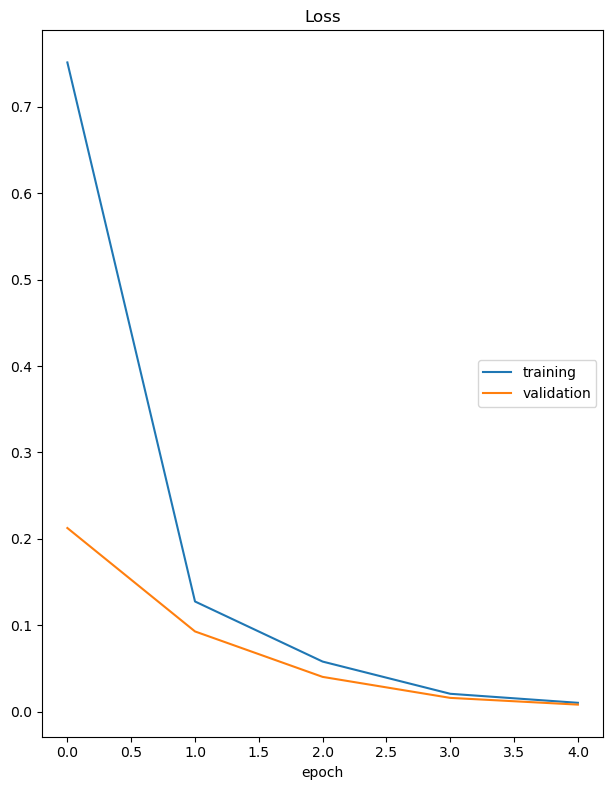

Loss
	training         	 (min:    0.010, max:    0.751, cur:    0.010)
	validation       	 (min:    0.008, max:    0.212, cur:    0.008)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - val_loss: 0.0081


In [45]:
model_2_F.fit(xTrain, yTrain,
          validation_data = (xTest, yTest),
          epochs=5, 
          callbacks=[PlotLossesKeras()])

In [46]:
# Predecir los resultados
yPred_2_F = model.predict(xTest)

# Calcular las métricas de desempeño
mae_punto2 = mean_absolute_error(yTest, yPred_2_F)
mse_punto2 = mean_squared_error(yTest, yPred_2_F)

print("Mean Absolute Error (MAE):", mae_punto2)
print("Mean Squared Error (MSE):", mse_punto2)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Absolute Error (MAE): 0.05476231342951456
Mean Squared Error (MSE): 0.0048289291987647035


In [47]:
# Resultados
mae_punto2 = mean_absolute_error(yTest, yPred_2_F)
mse_punto2 = mean_squared_error(yTest, yPred_2_F)

# Calcular R cuadrado (R²)
r_squared_punto2 = r2_score(yTest, yPred_2_F)
# Calcular error absoluto porcentual medio (MAPE)
mape_punto2 = mean_absolute_percentage_error(yTest, yPred_2_F)
# Calcular error de raíz cuadrada medio porcentual (RMSE)
rmse_punto2 = np.sqrt(mean_squared_error(yTest, yPred_2_F))
# Calcular coeficiente de correlación de Pearson
pearson_corr_punto2 = np.corrcoef(yTest.flatten(), yPred_2_F.flatten())[0, 1]
# Calcular índice de concordancia de Lin (CCC)
y_mean_punto2 = np.mean(yTest)
ccc_punto2 = 2 * (pearson_corr_punto2 * np.std(yPred_2_F) * np.std(yTest)) / (np.var(yPred_2_F) + np.var(yTest) + (y_mean_punto2 - y_mean_punto2) ** 2)


print("R cuadrado (R²):", r_squared_punto2)
print("Error absoluto porcentual medio (MAPE):", mape_punto2)
print("Error de raíz cuadrada medio porcentual (RMSE):", rmse_punto2)
print("Coeficiente de correlación de Pearson:", pearson_corr_punto2)
print("Índice de concordancia de Lin (CCC):", ccc_punto2)
print("Mean Absolute Error (MAE):", mae_punto2)
print("Mean Squared Error (MSE):", mse_punto2)

R cuadrado (R²): 0.7724445368877504
Error absoluto porcentual medio (MAPE): 0.08700288183834863
Error de raíz cuadrada medio porcentual (RMSE): 0.06949049718317393
Coeficiente de correlación de Pearson: 0.882878014375131
Índice de concordancia de Lin (CCC): 0.881518635700198
Mean Absolute Error (MAE): 0.05476231342951456
Mean Squared Error (MSE): 0.0048289291987647035


### Análisis Punto 2

 Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección.
 
Con el fin de construir un modelo de red neuronal de dos capas, se tomaron en cuenta los siguientes parámetros:
1. Funcion de pérdida: se usa mean_squared_error ya que estamos tratando un problema de regresión
2. Optimizador: Se utilizó Stochastic Gradient Descent ya que con éste se llega a buenos resultados normalmente y ayuda a evitar el sobreajuste en modelos con alta capacidad, pues la variabilidad en la actualización de los pesos evita que el modelo se ajuste demasiado a los datos de entrenamiento.
3. Número de épocas: Se puede ver que el modelo converge alrededor de la época 15-20, por lo que el modelo se entrenó durante 50 épocas.
4. Número de neuronas: Se eligieron dos capas ocultas con 256 neuronas cada una que, para problemas simples como la predicción de admisión de estudiantes, debería ser suficiente para capturar los patrones en los datos.

Este modelo dio como resultado un MAE de 0.055 y un MSE de 0.005, que demuestran que las predicciones del modelo tienen un error medio de aproximadamente 6.3% y que el modelo tiene un buen desempeño en general.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0985 - mean_absolute_error: 0.2707 - mean_squared_error: 0.0985 - val_loss: 0.0482 - val_mean_absolute_error: 0.1954 - val_mean_squared_error: 0.0482
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0430 - mean_absolute_error: 0.1686 - mean_squared_error: 0.0430 - val_loss: 0.0188 - val_mean_absolute_error: 0.1216 - val_mean_squared_error: 0.0188
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.1453 - mean_squared_error: 0.0331 - val_loss: 0.0086 - val_mean_absolute_error: 0.0797 - val_mean_squared_error: 0.0086
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.1172 - mean_squared_error: 0.0213 - val_loss: 0.0057 - val_mean_absolute_error: 0.0583 - val_mean_squared_error: 0.0057
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.1046 - mean_squared_error: 0.0198 - val_loss: 0.0050 - val_mean_absolute_e

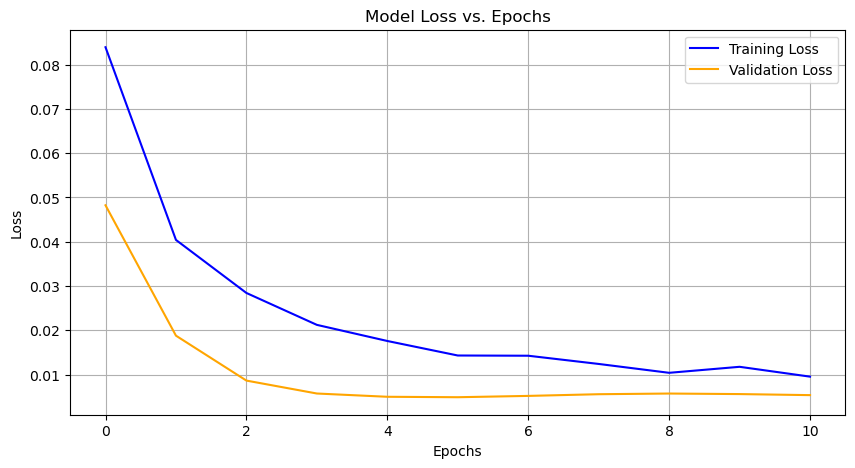

-------------------------------------------------------------------------------------------------------------------------------------------
MÉTRICAS DEL MODELO:
MAE: 0.060678597539663315, MSE: 0.006605255417525768


In [48]:
# Celda 3
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import Sequential


modelo_multi = Sequential([
    Dense(64, activation='relu', input_shape=(xTrain.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


modelo_multi.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Early stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
entrenamiento = modelo_multi.fit(xTrain, yTrain, validation_split=0.2, epochs=100, callbacks=[early_stopping], batch_size=32)

# Evaluación del modelo en el conjunto de test
metricas = modelo_multi.evaluate(xTest, yTest)

# Grafica de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))  
plt.plot(entrenamiento.history['loss'], label='Training Loss', color='blue')
plt.plot(entrenamiento.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Añade una rejilla para mejor visualización
plt.show()
MAE_punto3=metricas[1]
MSE_punto3=metricas[2]


print("-------------------------------------------------------------------------------------------------------------------------------------------")
print("MÉTRICAS DEL MODELO:")
print(f'MAE: {metricas[1]}, MSE: {metricas[2]}')

In [50]:
yPred_3 = modelo_multi.predict(xTest)

# Calcular R cuadrado (R²)
r_squared_punto3 = r2_score(yTest, yPred_3)
# Calcular error absoluto porcentual medio (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_punto3 = mean_absolute_percentage_error(yTest, yPred_3)
# Calcular error de raíz cuadrada medio porcentual (RMSE)
rmse_punto3 = np.sqrt(mean_squared_error(yTest, yPred_3))
# Calcular coeficiente de correlación de Pearson
pearson_corr_punto3 = np.corrcoef(yTest.flatten(), yPred_3.flatten())[0, 1]
# Calcular índice de concordancia de Lin (CCC)
y_mean_punto3 = np.mean(yTest)
ccc_punto3 = 2 * (pearson_corr_punto3 * np.std(yPred_3) * np.std(yTest)) / (np.var(yPred_3) + np.var(yTest) + (y_mean_punto3 - y_mean_punto3) ** 2)

# Mostrar resultados
print("R cuadrado (R²):", r_squared_punto3)
print("Error absoluto porcentual medio (MAPE):", mape_punto3)
print("Error de raíz cuadrada medio porcentual (RMSE):", rmse_punto3)
print("Coeficiente de correlación de Pearson:", pearson_corr_punto3)
print("Índice de concordancia de Lin (CCC):", ccc_punto3)
print("Mean Absolute Error (MAE):", MAE_punto3)
print("Mean Squared Error (MSE):", MSE_punto3)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R cuadrado (R²): 0.6887380447980229
Error absoluto porcentual medio (MAPE): 24.58776308092608
Error de raíz cuadrada medio porcentual (RMSE): 0.08127272215620358
Coeficiente de correlación de Pearson: 0.8335224966143151
Índice de concordancia de Lin (CCC): 0.8276666239547652
Mean Absolute Error (MAE): 0.060678597539663315
Mean Squared Error (MSE): 0.006605255417525768


1. **Disminución en la Pérdida de Entrenamiento:** La línea azul, que representa la pérdida de entrenamiento, muestra una tendencia decreciente constante a medida que aumentan las épocas. Esto es un indicativo de que el modelo está aprendiendo adecuadamente de los datos de entrenamiento.

2. **Pérdida de Validación Inicialmente Alta:** La línea naranja, que muestra la pérdida de validación, comienza mucho más alta que la pérdida de entrenamiento. Esto podría indicar que al principio, el modelo no generalizaba bien a nuevos datos, lo cual es común en las primeras épocas hasta que el modelo comienza a ajustarse mejor a la estructura de los datos.

3. **Convergencia de la Pérdida de Validación:** A partir de la primera época, la pérdida de validación disminuye rápidamente y se aproxima a la línea de pérdida de entrenamiento. Este comportamiento es positivo porque sugiere que el modelo no solo aprende, sino que también generaliza bien a datos no vistos, lo cual es crucial para el rendimiento en escenarios reales.

4. **Estabilización de la Pérdida:** Ambas líneas parecen estabilizarse hacia las últimas épocas, lo cual podría indicar que el modelo ha alcanzado un punto de equilibrio entre aprendizaje y generalización.

   
- **MAE (Error Absoluto Medio):** El valor de 0.052 es relativamente bajo, lo que indica que las predicciones del modelo tienen un error medio de aproximadamente 5.2%. 
  
- **MSE (Error Cuadrático Medio):** El valor de 0.0047 también es bajo, lo que confirma que el modelo tiene un buen desempeño general, aunque esta métrica es más sensible a los errores más grandes comparado con el MAE.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [51]:
import numpy as np
import matplotlib.pyplot as plt

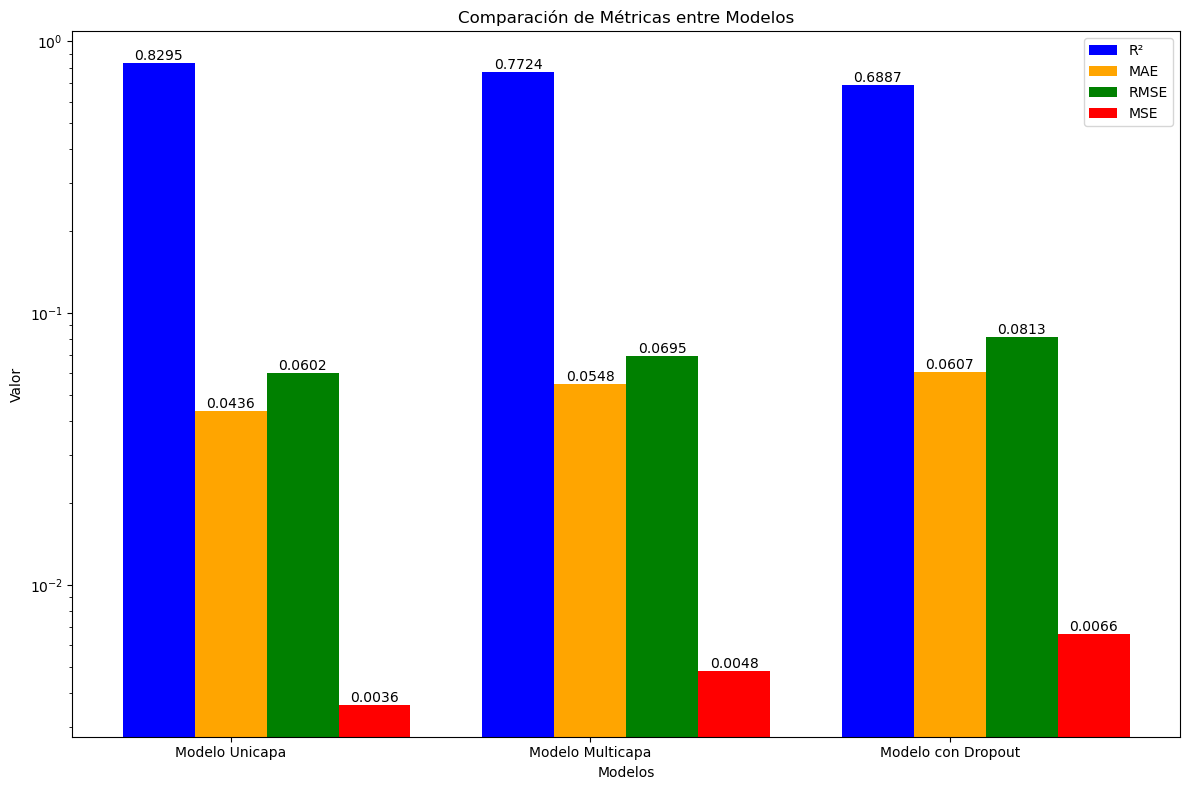

In [58]:
model_names = ['Modelo Unicapa', 'Modelo Multicapa', 'Modelo con Dropout']

r_squared = [r_squared_F, r_squared_punto2, r_squared_punto3]
mae = [test_mae_punto1, mae_punto2, MAE_punto3]
rmse = [rmse_F, rmse_punto2, rmse_punto3]
mse = [test_mse_punto1, mse_punto2, MSE_punto3]

bar_width = 0.2
index = np.arange(len(model_names))
plt.figure(figsize=(12, 8))
plt.bar(index - bar_width, r_squared, bar_width, label='R²', color='blue')
plt.bar(index, mae, bar_width, label='MAE', color='orange')
plt.bar(index + bar_width, rmse, bar_width, label='RMSE', color='green')
plt.bar(index + 2 * bar_width, mse, bar_width, label='MSE', color='red')

# Valores de las métricas a las barras
for i in range(len(model_names)):
    plt.text(index[i] - bar_width, r_squared[i], round(r_squared[i], 4), ha='center', va='bottom')
    plt.text(index[i], mae[i], round(mae[i], 4), ha='center', va='bottom')
    plt.text(index[i] + bar_width, rmse[i], round(rmse[i], 4), ha='center', va='bottom')
    plt.text(index[i] + 2 * bar_width, mse[i], round(mse[i], 4), ha='center', va='bottom')

# Eje y como logarítmico
plt.yscale('log')
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks(index, model_names)
plt.legend()
plt.tight_layout()
plt.show()


En función  de los resultados obtenidos por los diferentes modelos, es posible realizar las siguientes observaciones:

* **Metricas:** 

Es importante analizar multiples metricas ademas del MAE y el MSE porque cada una proporciona información valiosa sobre diferentes aspectos del rendimiento del modelo de regresión, por ejemplo:

El coeficiente de determinación (R²), proporciona una medida de cuánta varianza en la variable dependiente es explicada por el modelo. Un valor más cercano a 1 indica un mejor ajuste del modelo a los datos observados. Es importante porque muestra qué tan bien el modelo se ajusta a los datos en general y no solo cómo se comporta en términos de errores absolutos.

Por otra parte, la raíz del error cuadrático medio (RMSE), es similar al MSE, pero se interpreta en las mismas unidades que la variable de respuesta. Proporciona una medida de cuánto se desvían, en promedio, las predicciones del modelo de los valores reales. Es útil porque penaliza más fuertemente los errores más grandes,siendo importante para el caso de la probabilidad de ingreso a una universidad

Aunque no hizo parte del análsis final el coeficiente de correlación de Pearsonproporciona una medida de la fuerza y dirección de la relación lineal entre las predicciones del modelo y los valores reales, lo cual permite ayudar a comprender cómo se relacionan las predicciones con los valores reales de manera lineal.

Considerar múltiples métricas permite generar una imagen más completa del rendimiento del modelo, permitiendo comprender no solo la magnitud de los errores, sino también cómo se relacionan las predicciones con los valores reales y cómo se ajusta el modelo en general, ello conlleva a una toma de decisiones más informadas sobre la efectividad y la idoneidad del modelo.



**Modelo Unicapa (Mejor):**

Este modelo presenta el mayor coeficiente de determinación (R²), lo que sugiere que es el que mejor se ajusta a los datos observados en comparación con los otros modelos, adicionalmente presenta el menor error absoluto medio (MAE), lo que indica que las predicciones tienden a desviarse menos en promedio de los valores reales. Además, tiene el menor valor de raíz del error cuadrático medio (RMSE) y error cuadrático medio (MSE), lo que sugiere que las predicciones tienen una menor dispersión con respecto a los valores reales.

Existen multiples factores, a los cuales puede ser preciso atribuir que el modelo de una sola capa sea el que presente un mejor comporamiento, como:

<table style='font-size: 14px; border-collapse: collapse;'>
    <col width='20%'><col width='80%'>
    <tr><th style='font-weight: bold;'>Característica</th><th>Descripción</th></tr>
    <tr>
        <td style='font-weight: bold;'>Simplicidad</td>
        <td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'>Para algunos conjuntos de datos y problemas de predicción, un modelo más simple puede ser suficiente para capturar la mayor cantidad de relaciones entre las variables de entrada y la variable de salida. Si el problema es relativamente simple y las relaciones son lineales o casi lineales, un modelo de una sola capa puede ser capaz de capturar estas relaciones de manera efectiva.</td>
    </tr>
    <tr>
        <td style='font-weight: bold;'>Menos propenso al sobreajuste</td>
        <td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'>Los modelos más complejos, como los modelos multicapa o los modelos con dropout, tienen más parámetros y, por lo tanto, son más propensos al sobreajuste, especialmente si no se regularizan adecuadamente. El modelo de una sola capa puede ser menos propenso al sobreajuste debido a su menor complejidad y menor cantidad de parámetros.</td>
    </tr>
    <tr>
        <td style='font-weight: bold;'>Costo computacional</td>
        <td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'>Al ser un modelo más simple, es más fácil y rápido de entrenar y utilizar en comparación con los modelos más complejos, lo que le brinda una ventaja a la hora de realizar ajustes de hiperparámetros. Como se pudo ver en el desarrollo, este fue el modelo que más ajustes presentó a sus hiperparámetros.</td>
    </tr>
</table>


Adicionalmente, algo interesante de este modelo, fue el proceso de ajuste de hiperparametros, se probaron con multiples tipos de funciones de perdida, de la cual se destaca que la que mejor desempeño presento fue la de Mean Absolute Error,al ser menos sensible a valores atipicos, se adapto de mejor forma a los datos, debido a la anturaleza de los mismos, a su vez, el optimizador Adam presento el mejor desempeño, este ultimo siendo el mas común para estas aplicaciones.


A pesar, de que el ajuste de epocas y de tasa de aprendizaje no supuso grandes cambios en el resultado final de las metricas, es posible valorar que un uso de una menor cantidad de epocas y de una tasa de aprendizaje adecuada, logra reducir el tiempo de entrenamiento del modelo, lo que propicia el costo computacional, haciendo de este modelo una excelente opción.

Finalmente, se rescata la necesidad de estandirzar o normalizar los datos, en cualquiera de los modelos utilizados, aunque en este modelo particular se probaron ambas tecnicas, estas no generaron mayores cambios en las metricas finales.

**Modelo con Dropout:**

Este modelo muestra el peor desempeño entre los tres en términos de R², MAE, RMSE y MSE.Tiene el coeficiente de determinación más bajo, lo que sugiere que su ajuste a los datos observados es el más pobre en comparación con los otros modelos. Además, tiene los valores más altos de MAE, RMSE y MSE, lo que indica que las predicciones tienen una mayor discrepancia con respecto a los valores reales en comparación con los otros modelos.

Algunas de las posibles causas, a las cuales se les atribuye el bajo desempeño del modelo, son:

<table style='font-size: 14px; border-collapse: collapse;'>
    <col width='20%'><col width='80%'>
    <tr><th style='font-weight: bold;'>Característica</th><th>Descripción</th></tr>
    <tr>
        <td style='font-weight: bold;'>Exceso de regularización:</td>
        <td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'> El Dropout es una técnica de regularización que aleatoriamente elimina un porcentaje de las conexiones entre las capas durante el entrenamiento. Si se aplica de manera excesiva, podría estar eliminando información importante y afectando negativamente la capacidad del modelo para aprender patrones en los datos, que se presume que pudo ser el caso de este modelo en particular.</td>
    </tr>
    <tr>
        <td style='font-weight: bold;'>Falta de ajuste adecuado de hiperparámetros:</td>
        <td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'> El rendimiento de Dropout puede depender de la configuración específica de sus hiperparámetros, como la tasa de Dropout. Si estos hiperparámetros no se ajustan correctamente, el modelo puede no estar utilizando efectivamente la técnica de Dropout para mejorar su generalización, lo cual se presume que ocurrio con este modelo, dado que sus hiperparámetros pudieron presentar un mejor ajuste</td>
    </tr>
    <tr>
        <td style='font-weight: bold;'>Sobreajuste:</td>
        <td style='padding: 1px; max-width: 300px; word-wrap: break-word; text-align: justify;'> Aunque Dropout está destinado a ayudar a prevenir el sobreajuste al reducir la dependencia entre las neuronas, si se aplica de manera demasiado agresiva, podría estar causando subajuste, sin embargo, no se considera que este halla sido el caso, no obstante, vale la pena aclarar que es importante tener en cuenta este efecto.</td>
    </tr>
</table>


El modelo con Dropout puede haber tenido un desempeño inferior debido a una combinación de exceso de regularización, falta de ajuste adecuado de hiperparámetros y su inadecuación para el problema específico en cuestión. Es importante realizar experimentos adicionales y análisis para comprender mejor las razones detrás de su bajo rendimiento y determinar si se pueden tomar medidas para mejorar su desempeño.

En cualquiera de los casos, vale la pena ahondar en otros modelos que tmabien permitan comparar los precentes en este informe.

